In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import mean_squared_error as mse
pd.set_option('max_columns',50)
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.titlesize'] = 16


In [16]:
data_train = pd.read_csv('../d_train_20180102.csv',encoding='gb2312',index_col='id')
data_test = pd.read_csv('../d_test_A_20180102.csv',encoding='gb2312',index_col='id')
data_test_b = pd.read_csv('../d_test_B_20180128.csv',encoding='gb2312',index_col='id')
train = data_train.copy()
test = data_test.copy()
test_b = data_test_b.copy()

训练集中的样本采集自9月10日到12月10日，测试集10月10日到12月10日

In [40]:
# big_error = pd.read_pickle('big_error_index.pickle')
# big_error.index

In [27]:
# test_b['体检日期'].value_counts()

In [26]:
# test['体检日期'].value_counts()

In [25]:
# train['体检日期'].value_counts()

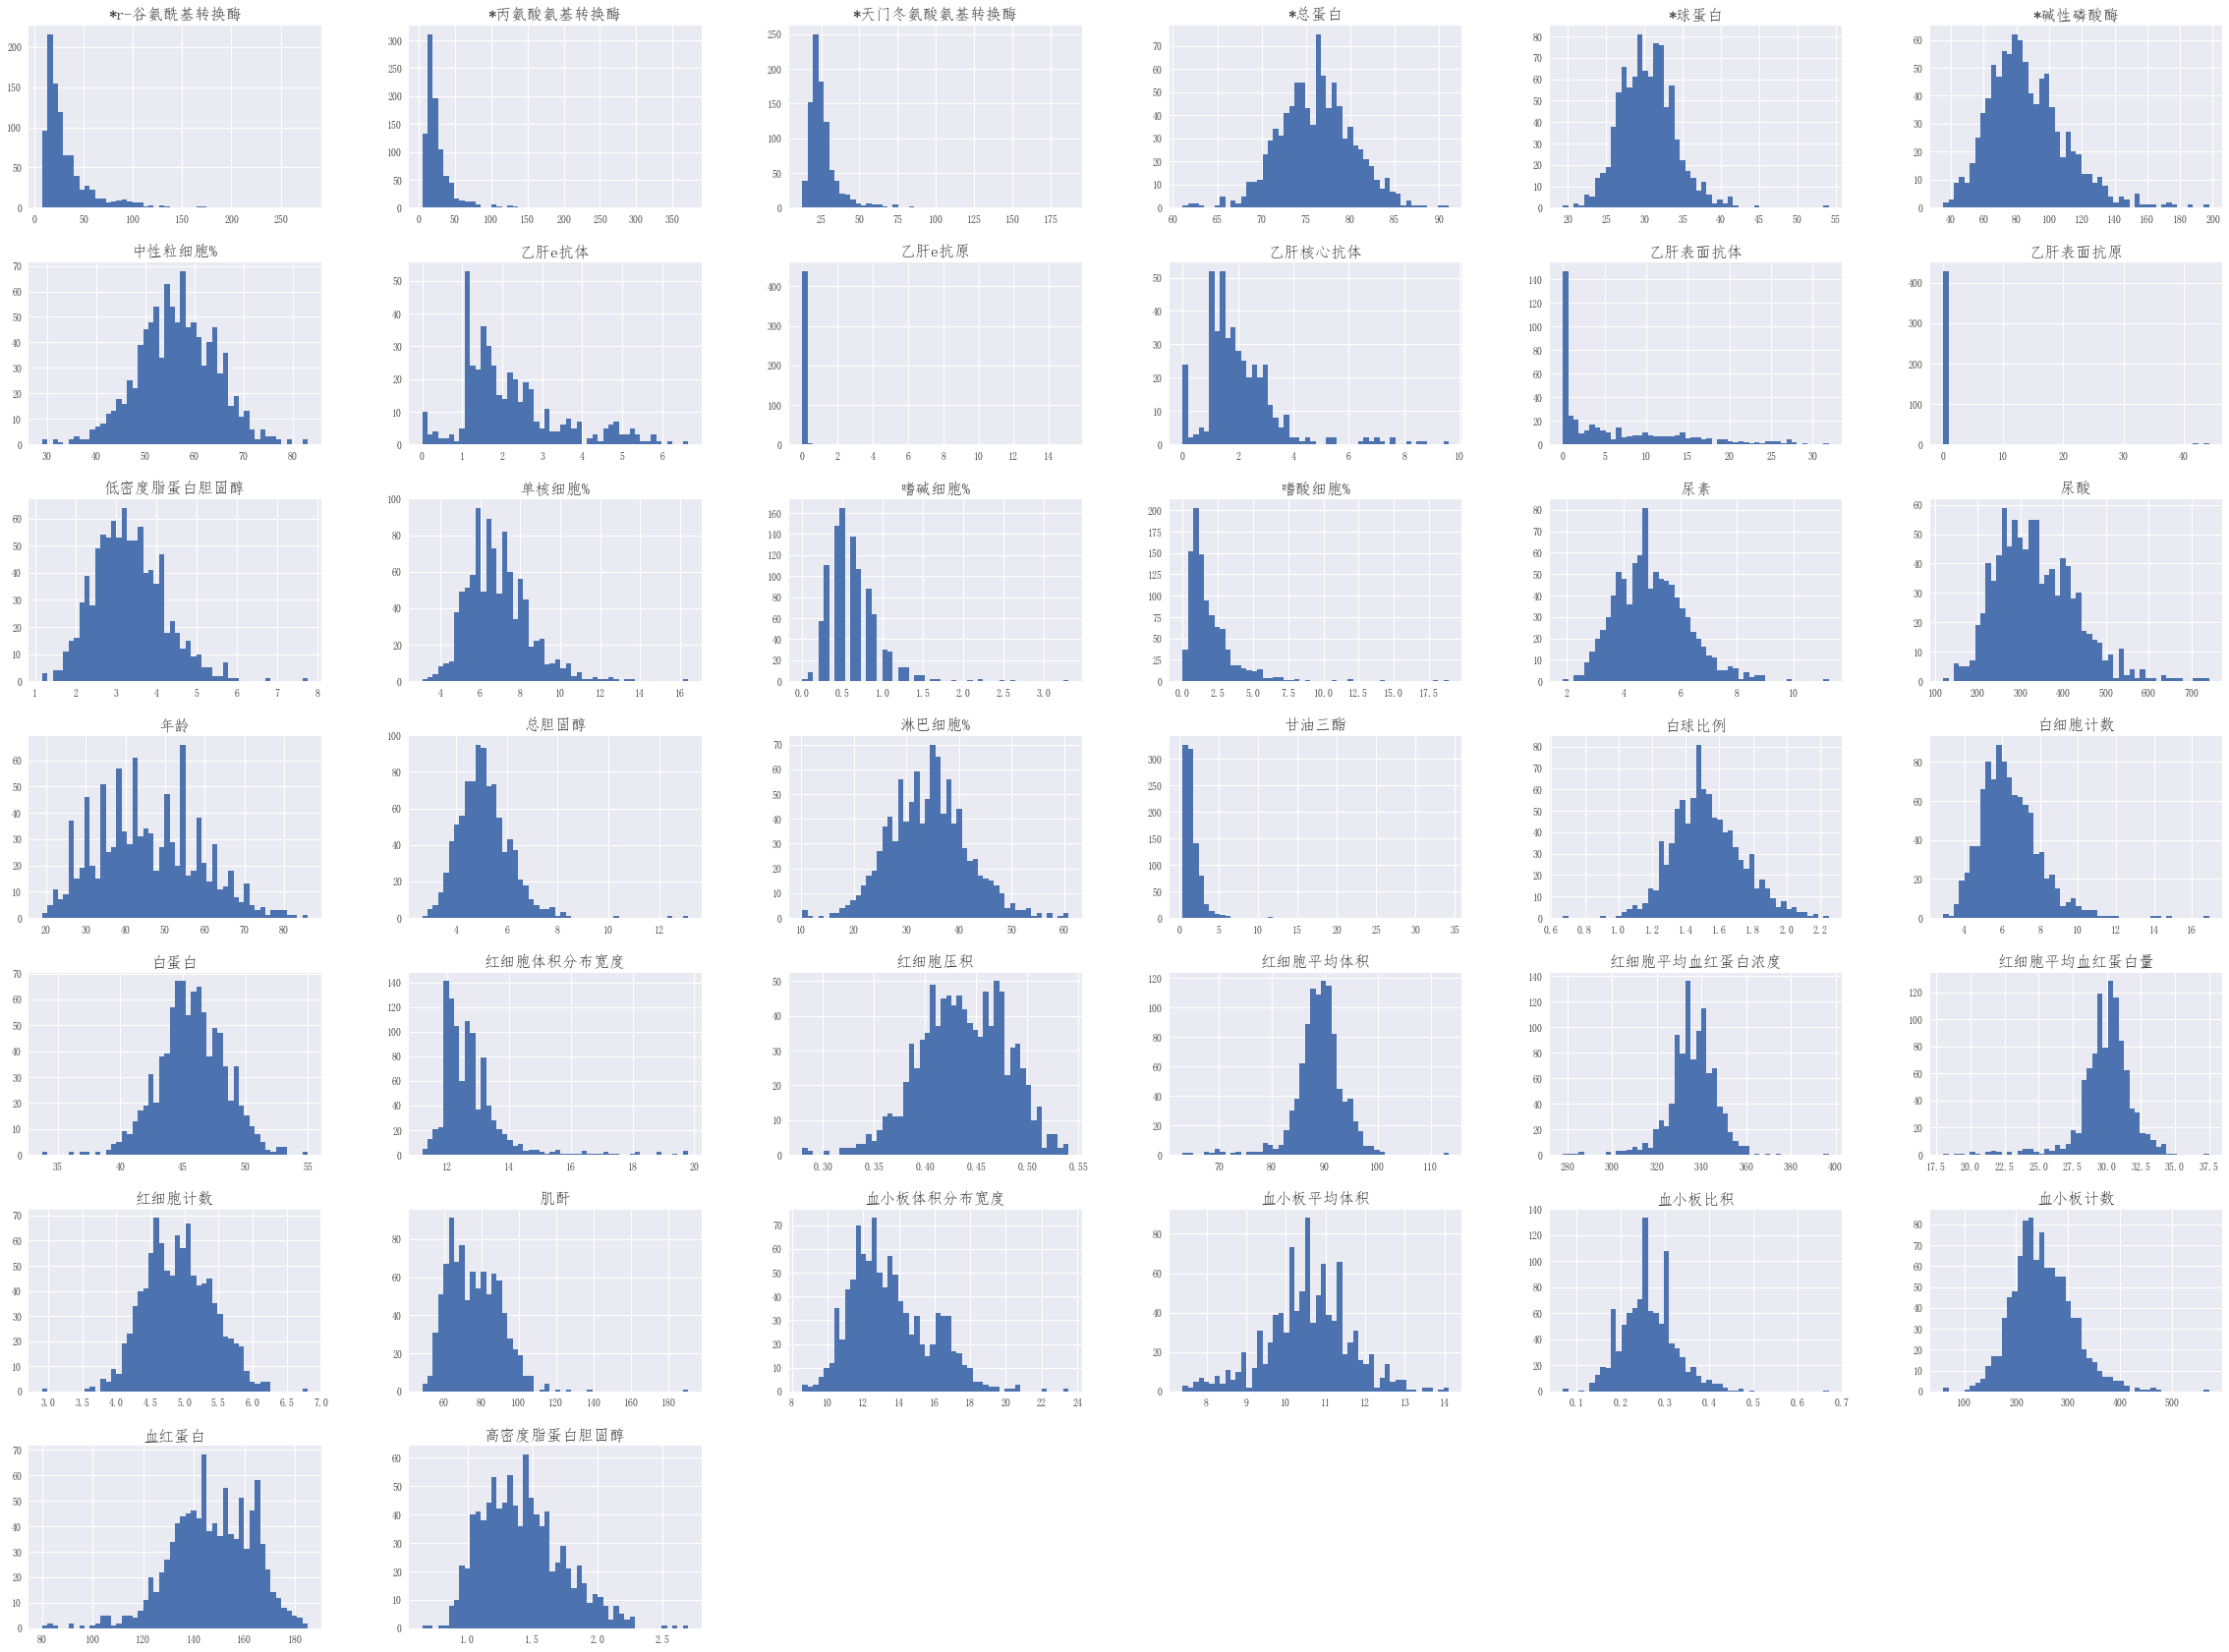

In [19]:
test_b.hist(bins=50,figsize=(40,30))
plt.show()

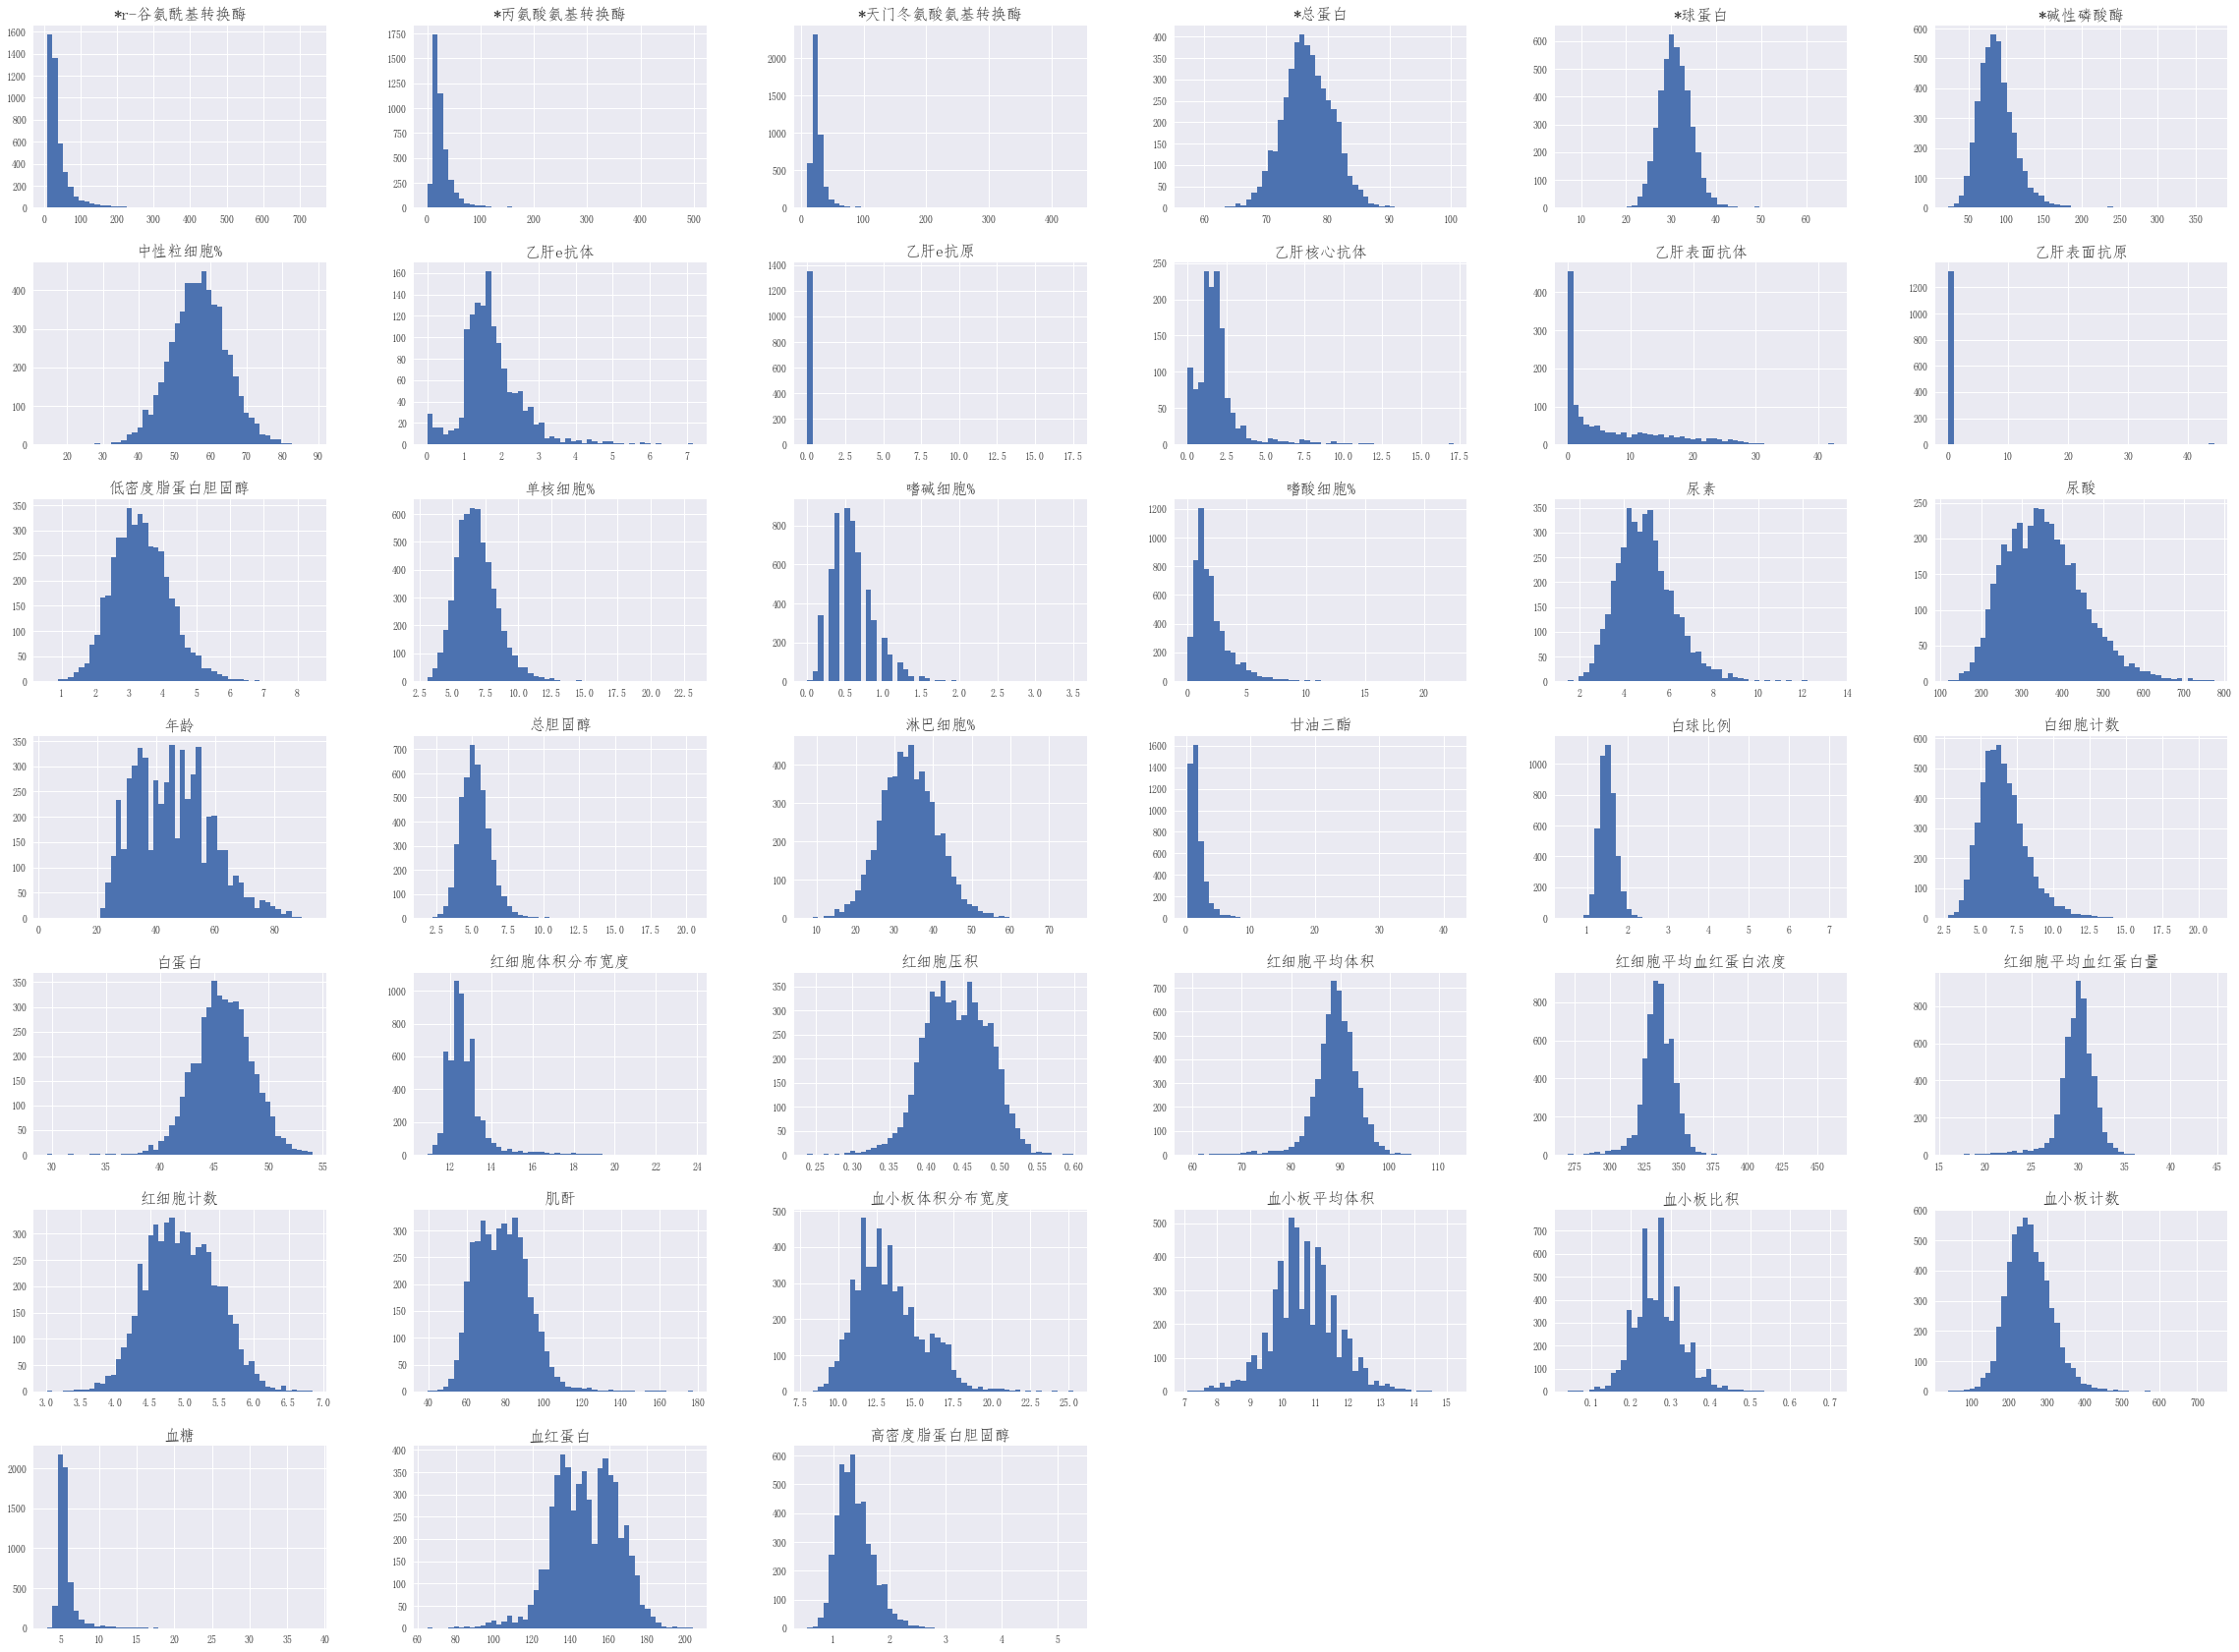

In [7]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.titlesize'] = 16
train.hist(bins=50,figsize=(40,30))
plt.show()

In [3]:
# train['体检日期'] = pd.to_datetime(train['体检日期'])
train.sort_values('血糖',ascending=False)
# train

,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,总胆固醇,高密度脂蛋白胆固醇,低密度脂蛋白胆固醇,尿素,肌酐,尿酸,乙肝表面抗原,乙肝表面抗体,乙肝e抗原,乙肝e抗体,乙肝核心抗体,白细胞计数,红细胞计数,血红蛋白,红细胞压积,红细胞平均体积,红细胞平均血红蛋白量,红细胞平均血红蛋白浓度,红细胞体积分布宽度,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4228,女,41,26/09/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.70,95.82,271.37,NaN,NaN,NaN,NaN,NaN,6.69,5.43,154.0,0.442,81.4,28.4,348.0,12.9,268.0,11.2,14.2,0.30,62.7,30.0,5.7,1.0,0.6,38.43
4189,男,44,26/09/2017,18.51,16.36,109.19,10.74,76.02,45.63,30.39,1.50,0.95,5.18,2.22,2.68,8.11,95.12,400.90,NaN,NaN,NaN,NaN,NaN,7.32,4.33,130.0,0.371,85.7,30.0,350.0,12.1,226.0,9.8,10.6,0.22,64.3,27.6,5.9,1.5,0.7,23.62
5683,男,71,10/10/2017,24.79,18.32,83.53,16.28,76.53,40.75,35.78,1.14,1.77,4.36,0.98,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39,5.79,166.0,0.487,84.1,28.7,341.0,13.7,166.0,11.8,16.8,0.20,70.9,22.1,5.8,0.6,0.6,22.59
2933,男,68,19/09/2017,18.46,14.59,84.31,51.80,77.05,42.35,34.70,1.22,22.13,10.05,0.68,5.10,8.75,145.04,521.75,NaN,NaN,NaN,NaN,NaN,6.12,4.12,125.0,0.346,84.0,30.3,361.0,11.9,172.0,10.3,12.6,0.18,61.8,28.6,5.2,3.4,1.0,22.49
5303,男,45,09/10/2017,14.60,21.73,136.27,31.29,74.71,44.99,29.72,1.51,1.12,6.04,1.18,4.55,3.16,74.17,290.58,NaN,NaN,NaN,NaN,NaN,6.60,5.46,161.0,0.476,87.2,29.5,338.0,11.9,310.0,11.0,13.8,0.34,68.2,23.2,6.5,1.2,0.9,18.95
1239,男,30,19/10/2017,94.63,150.22,96.79,111.07,70.48,45.02,25.46,1.77,6.58,5.03,0.96,3.27,2.86,70.87,404.38,NaN,NaN,NaN,NaN,NaN,8.04,5.59,160.0,0.461,82.5,28.6,347.0,12.8,219.0,10.1,12.5,0.22,65.6,26.6,4.7,2.7,0.4,18.51
3684,男,48,25/09/2017,20.01,23.44,82.97,34.75,78.10,47.07,31.03,1.52,2.04,4.73,1.08,3.18,4.99,81.04,273.87,NaN,NaN,NaN,NaN,NaN,5.28,5.38,163.0,0.469,87.2,30.3,348.0,11.3,264.0,10.6,12.2,0.28,66.1,26.7,5.5,0.9,0.8,18.42
2983,男,45,20/09/2017,16.58,14.60,72.41,35.88,81.79,47.40,34.39,1.38,4.60,5.19,1.11,3.42,5.68,90.81,230.34,NaN,NaN,NaN,NaN,NaN,4.89,5.43,170.0,0.487,89.7,31.3,349.0,11.9,204.0,11.5,15.5,0.23,46.9,41.7,10.4,1.0,0.0,17.85
1858,女,82,12/10/2017,40.05,41.99,95.50,64.00,78.55,40.92,37.63,1.09,1.67,5.21,1.05,3.87,6.31,82.33,280.12,NaN,NaN,NaN,NaN,NaN,6.13,4.86,154.0,0.460,94.7,31.7,335.0,11.9,254.0,11.3,13.9,0.29,64.6,26.8,6.2,1.1,1.3,17.67


In [14]:
train['乙肝表面抗原'].dropna().sort_values(ascending=False)

id
4787    44.35
3526    44.20
5437    44.19
5362    44.07
4700    44.03
3750    43.89
4823    43.85
5085    43.78
3326    42.82
3386    42.67
3374    42.63
3498    42.46
2992    42.25
5724    41.70
4609    39.96
2289    39.88
4777    38.53
4704    37.63
2669    37.50
2609    37.06
4373    36.50
5415    33.43
5450    33.07
4845    30.82
2272    30.54
2668    30.00
4955    29.84
4782    28.21
4741    25.60
4783    23.54
        ...  
4295     0.01
4330     0.01
4331     0.01
4332     0.01
4343     0.01
4344     0.01
4348     0.01
4349     0.01
4350     0.01
4355     0.01
4359     0.01
4360     0.01
4361     0.01
4567     0.01
4608     0.01
4606     0.01
5725     0.01
4596     0.01
4594     0.01
4364     0.01
4590     0.01
4563     0.01
4378     0.01
4377     0.01
4370     0.01
4367     0.01
4366     0.01
3        0.01
4213     0.00
4165     0.00
Name: 乙肝表面抗原, dtype: float64

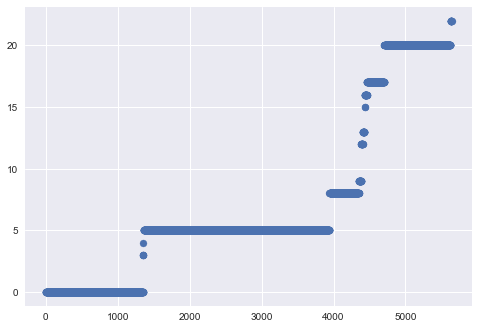

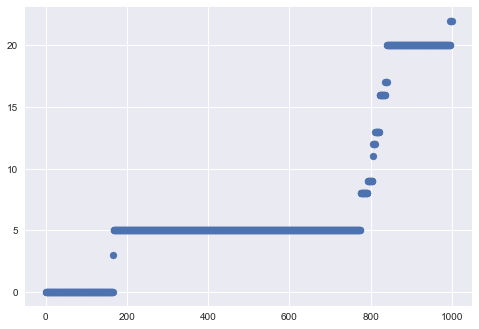

In [8]:
train_nan_num = train.apply(lambda x : train.shape[1] - x.count(),axis=1)
test_nan_num = test.apply(lambda x : test.shape[1] - x.count(),axis = 1)
plt.scatter(range(train_nan_num.shape[0]),np.sort(train_nan_num))
plt.show()
plt.scatter(range(test_nan_num.shape[0]),np.sort(test_nan_num))
plt.show()

In [99]:
train_age = train.loc[:,'*天门冬氨酸氨基转换酶':'嗜碱细胞%'].apply(lambda x : x/train['年龄'],axis=0)

In [101]:
pd.concat([train,train_age],axis=1)

,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,总胆固醇,高密度脂蛋白胆固醇,低密度脂蛋白胆固醇,尿素,肌酐,尿酸,乙肝表面抗原,乙肝表面抗体,乙肝e抗原,乙肝e抗体,乙肝核心抗体,白细胞计数,红细胞计数,...,尿素,肌酐,尿酸,乙肝表面抗原,乙肝表面抗体,乙肝e抗原,乙肝e抗体,乙肝核心抗体,白细胞计数,红细胞计数,血红蛋白,红细胞压积,红细胞平均体积,红细胞平均血红蛋白量,红细胞平均血红蛋白浓度,红细胞体积分布宽度,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,男,41,2017-12-10,24.96,23.10,99.59,20.23,76.88,49.60,27.28,1.82,1.31,4.43,1.37,2.65,5.87,77.25,349.39,NaN,NaN,NaN,NaN,NaN,5.34,5.21,...,0.143171,1.884146,8.521707,NaN,NaN,NaN,NaN,NaN,0.130244,0.127073,4.051220,0.011683,2.241463,0.778049,8.463415,0.312195,4.048780,0.241463,0.424390,0.004000,1.319512,0.834146,0.158537,0.114634,0.014634
2,男,41,2017-10-19,24.57,36.25,67.21,79.00,79.43,47.76,31.67,1.51,2.81,4.06,0.93,2.63,5.26,87.12,486.78,NaN,NaN,NaN,NaN,NaN,7.65,5.21,...,0.128293,2.124878,11.872683,NaN,NaN,NaN,NaN,NaN,0.186585,0.127073,3.804878,0.011122,2.134146,0.729268,8.341463,0.326829,6.756098,0.224390,0.251220,0.006341,1.268293,0.895122,0.141463,0.114634,0.019512
3,男,46,2017-10-26,20.82,15.23,63.69,38.17,86.23,48.00,38.23,1.26,0.99,4.13,1.64,2.01,4.77,78.19,452.07,0.01,0.02,0.01,1.37,1.070,4.60,4.76,...,0.103696,1.699783,9.827609,0.000217,0.000435,0.000217,0.029783,0.023261,0.100000,0.103478,3.234783,0.009522,1.997826,0.680435,7.391304,0.282609,5.239130,0.180435,0.360870,0.004326,1.045652,0.876087,0.167391,0.069565,0.017391
4,女,22,2017-10-25,14.99,10.59,74.08,20.22,70.98,44.02,26.96,1.63,1.06,6.89,1.43,5.04,4.23,61.46,368.85,NaN,NaN,NaN,NaN,NaN,9.36,4.29,...,0.192273,2.793636,16.765909,NaN,NaN,NaN,NaN,NaN,0.425455,0.195000,6.227273,0.018318,4.268182,1.450000,15.454545,0.572727,11.454545,0.468182,0.490909,0.011818,1.895455,2.113636,0.304545,0.209091,0.022727
5,女,48,2017-10-26,20.07,14.78,75.79,22.72,78.05,41.83,36.22,1.15,0.97,5.37,1.27,3.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.07,5.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105625,0.107292,2.208333,0.007375,1.431250,0.429167,6.229167,0.345833,6.583333,0.231250,0.291667,0.007292,1.179167,0.689583,0.189583,0.012500,0.012500
6,女,74,2017-10-18,23.72,22.59,81.23,23.35,76.46,45.85,30.61,1.50,2.45,6.65,1.81,4.28,6.11,66.66,383.87,0.05,0.55,0.01,1.22,1.570,7.00,4.64,...,0.082568,0.900811,5.187432,0.000676,0.007432,0.000135,0.016486,0.021216,0.094595,0.062703,1.909459,0.005581,1.200000,0.410811,4.635135,0.182432,3.364865,0.114865,0.229730,0.002851,0.579730,0.635135,0.095946,0.028378,0.013514
7,男,31,2017-09-21,24.97,25.53,109.03,65.42,80.82,46.40,34.42,1.35,1.51,5.60,1.33,3.82,6.14,95.98,446.10,NaN,NaN,NaN,NaN,NaN,6.81,6.03,...,0.198065,3.096129,14.390323,NaN,NaN,NaN,NaN,NaN,0.219677,0.194516,5.548387,0.016258,2.696774,0.919355,11.000000,0.387097,7.935484,0.348387,0.429032,0.008710,1.706452,1.032258,0.364516,0.100000,0.022581
8,男,55,2017-09-21,37.32,40.03,88.49,25.15,74.17,41.63,32.54,1.28,1.32,5.92,1.28,4.20,6.31,92.16,344.73,NaN,NaN,NaN,NaN,NaN,5.78,4.90,...,0.114727,1.675636,6.267818,NaN,NaN,NaN,NaN,NaN,0.105091,0.089091,2.872727,0.008145,1.661818,0.585455,6.418182,0.227273,5.127273,0.190909,0.236364,0.005455,0.960000,0.670909,0.120000,0.050909,0.016364
9,男,39,2017-10-16,21.70,39.17,102.91,67.09,76.12,49.31,26.81,1.84,2.07,5.50,1.51,3.60,4.98,78.57,353.31,0.06,0.10,0.03,2.23,2.170,6.96,4.94,...,0.127692,2.014615,9.059231,0.001538,0.002564,0.000769,0.057179,0.055641,0.178462,0.126667,4.179487,0.012359,2.502564,0.846154,8.666667,0.302564,7.051282,0.251282,0.292308,0.006923,1.361538,0.920513,0.187179,0.084615,0.010256


In [89]:
from scipy.stats import boxcox
y = boxcox(train['血糖'],lmbda=-1)

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


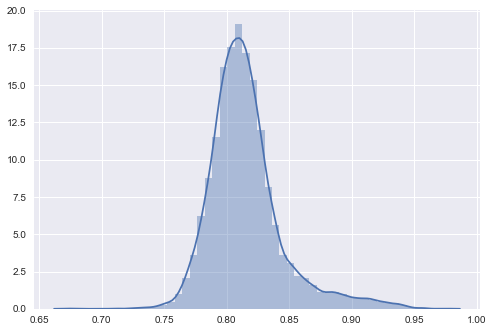

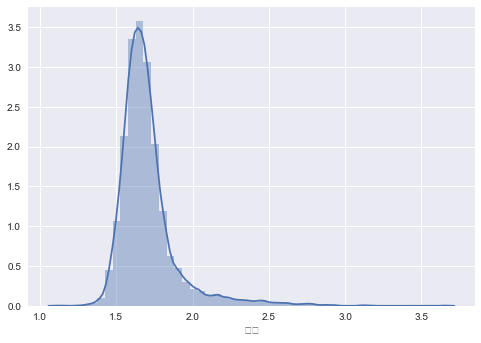

In [90]:
sns.distplot(y)
plt.show()
sns.distplot(np.log(train['血糖']))
plt.show()

In [38]:
# train['有无蛋白指标'] = np.where(train['白蛋白'].isnull(),0,1)
# sns.boxplot(x="有无蛋白指标", y="血糖", data=train)
# plt.show()
# train['有无固醇指标'] = np.where(train['甘油三酯'].isnull(),0,1)
# sns.boxplot(x="有无固醇指标", y="血糖", data=train)
# plt.show()

In [39]:
# train['有无血指标'] = np.where(train['血红蛋白'].isnull(),0,1)
# sns.boxplot(x="有无血指标", y="血糖", data=train)
# plt.show()

In [40]:
# train['有无细胞指标'] = np.where(train['淋巴细胞%'].isnull(),0,1)
# sns.boxplot(x="有无细胞指标", y="血糖", data=train)
# plt.show()

In [41]:
# # 样本的完整程度
# 1- train.apply(lambda x: x.count(),axis=0)/train.shape[0]

In [44]:
# train['有无酶指标'] = np.where(train['*碱性磷酸酶'].isnull(),0,1)
# sns.boxplot(x="有无酶指标", y="血糖", data=train)
# plt.show()

In [53]:
day_mean = train.groupby('体检日期').agg({'血糖':np.mean})

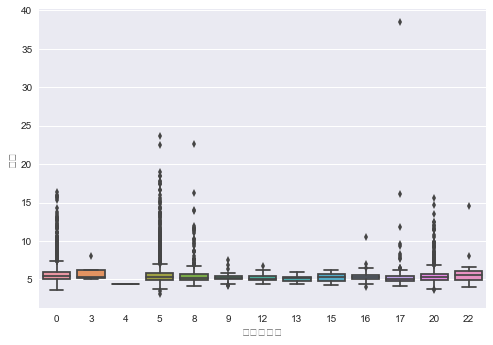

In [24]:
# train['缺失值数量'] = train.apply(lambda x:train.shape[1]-x.count(),axis=1)
sns.boxplot(x="缺失值数量", y="血糖", data=train)
plt.show()

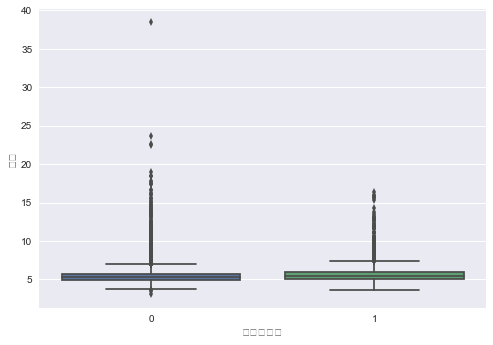

In [25]:
train['有无肝指标'] = np.where(train['乙肝表面抗原'].isnull(),0,1)
sns.boxplot(x="有无肝指标", y="血糖", data=train)
plt.show()

In [10]:
test['体检日期'].value_counts().sort_index()

10/10/2017     36
11/10/2017    101
12/10/2017     89
13/10/2017    141
16/10/2017     77
17/10/2017    122
18/10/2017    106
19/10/2017    111
20/10/2017     52
23/10/2017     25
24/10/2017     30
25/10/2017     36
26/10/2017     31
27/10/2017     15
30/10/2017     14
31/10/2017     14
Name: 体检日期, dtype: int64

In [11]:
train['体检日期'].value_counts().sort_index()

2017-09-10    118
2017-09-15    127
2017-09-18    117
2017-09-19    147
2017-09-20    155
2017-09-21    425
2017-09-22    332
2017-09-24     20
2017-09-25    310
2017-09-26    305
2017-09-27    248
2017-09-28    238
2017-09-29    280
2017-09-30    239
2017-10-10    170
2017-10-13    183
2017-10-16    118
2017-10-17    210
2017-10-18    113
2017-10-19    173
2017-10-20    182
2017-10-23    117
2017-10-24    188
2017-10-25    140
2017-10-26    171
2017-10-27    163
2017-10-30    121
2017-10-31    212
2017-11-10    159
2017-12-10    161
Name: 体检日期, dtype: int64

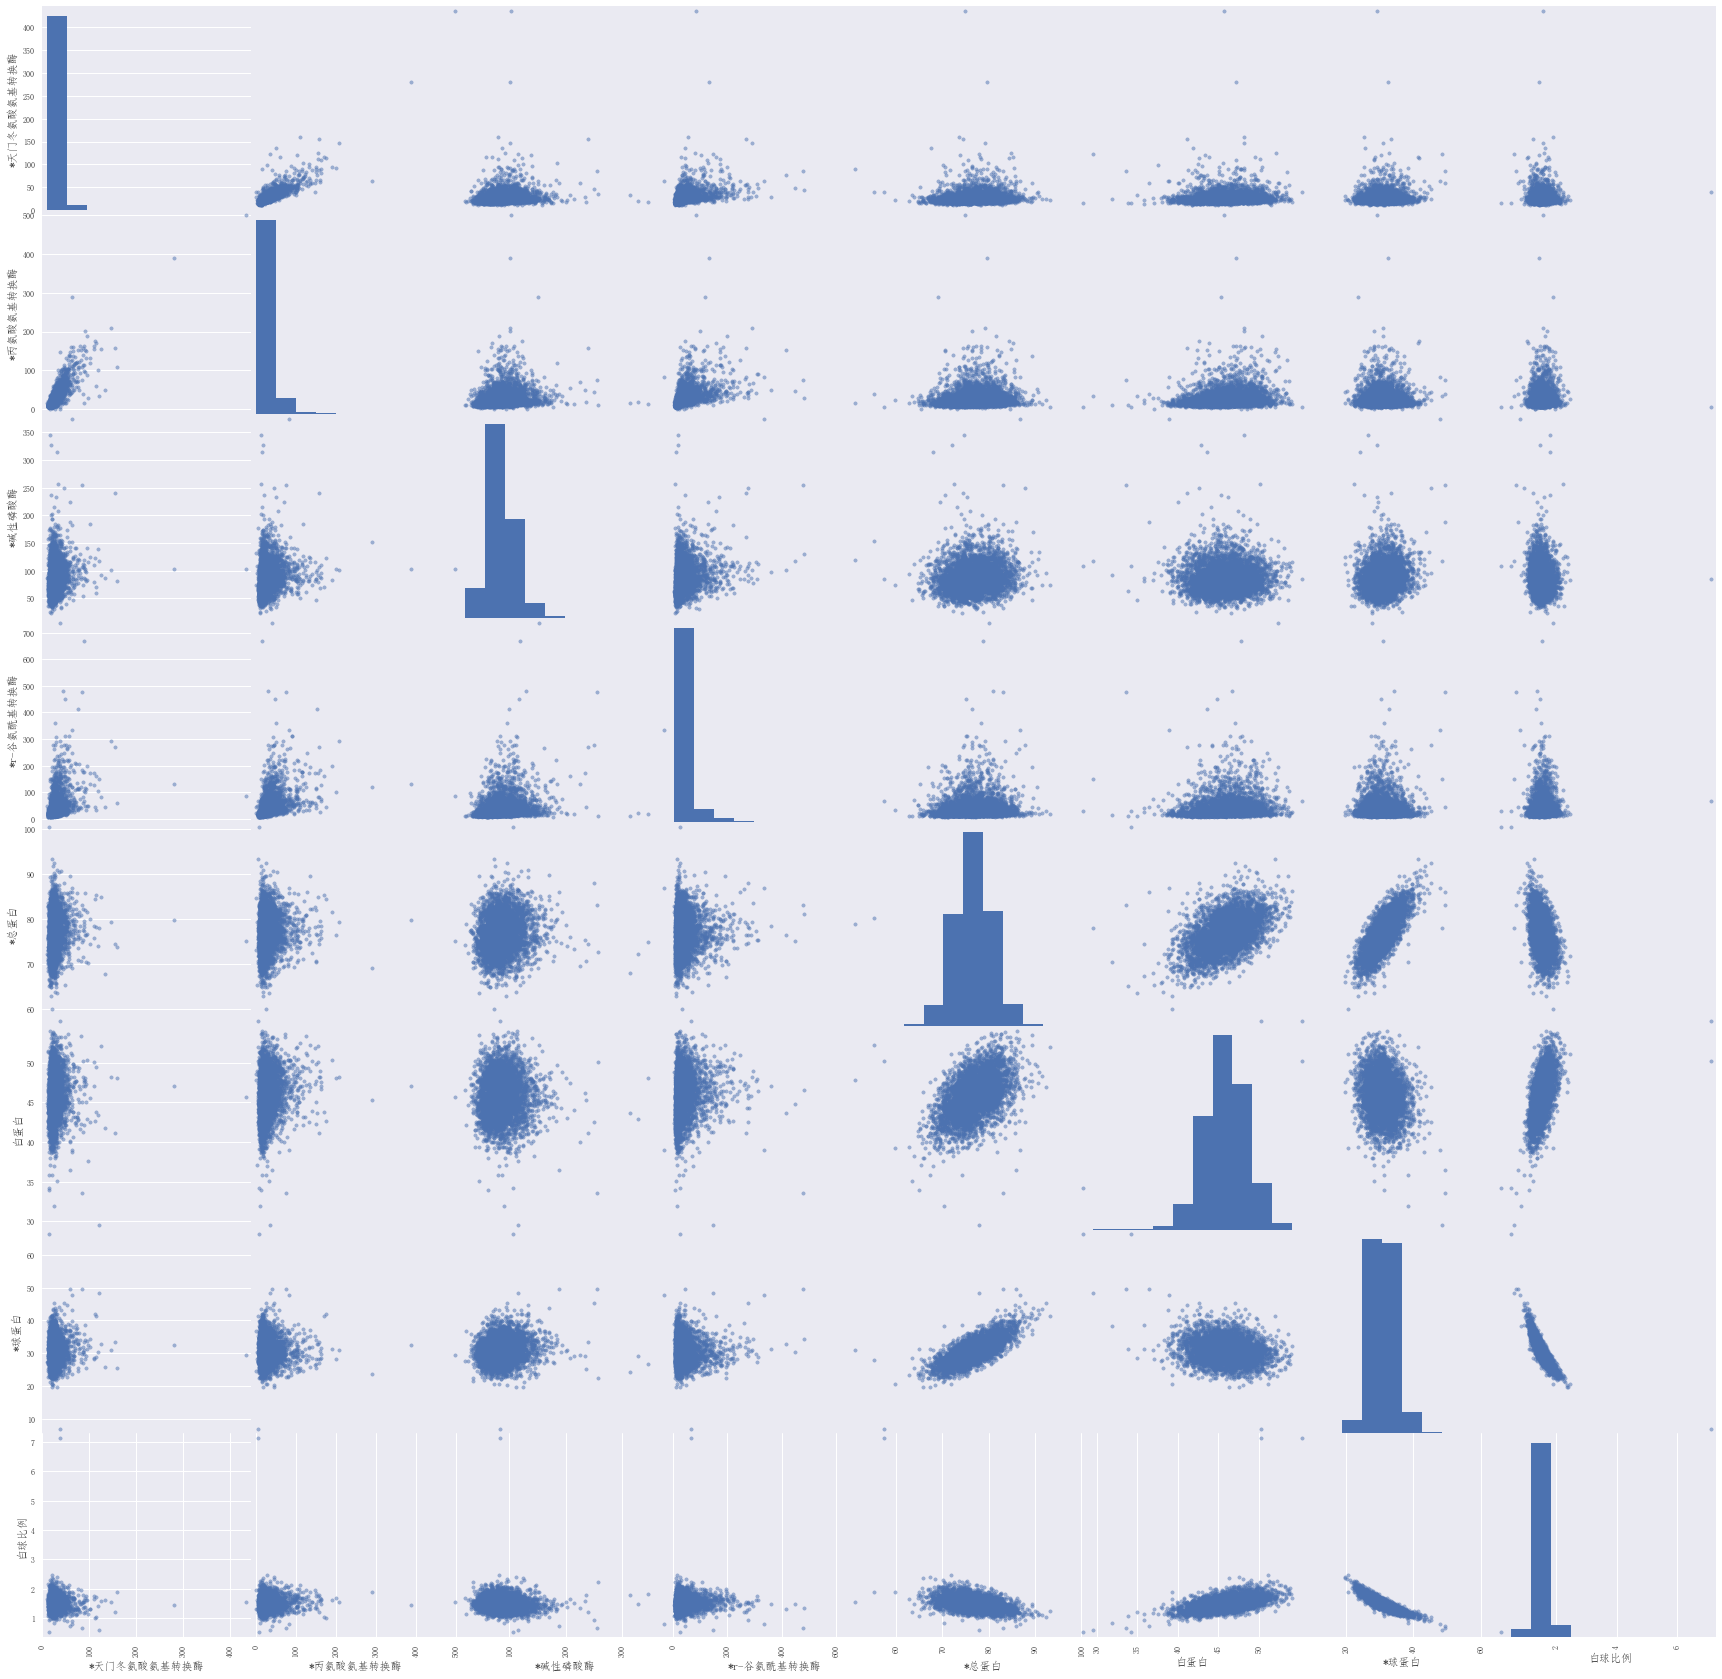

In [44]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train.loc[:,'*天门冬氨酸氨基转换酶':'白球比例'],figsize=(30,30))
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


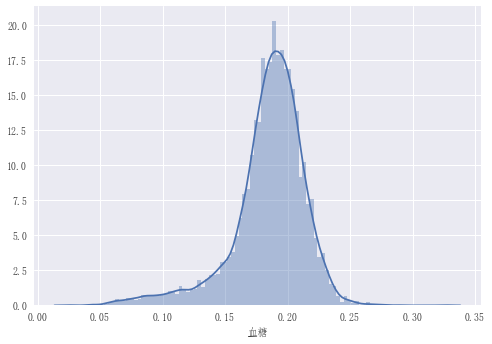

In [56]:
sns.distplot(1/train['血糖'],bins=100)
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


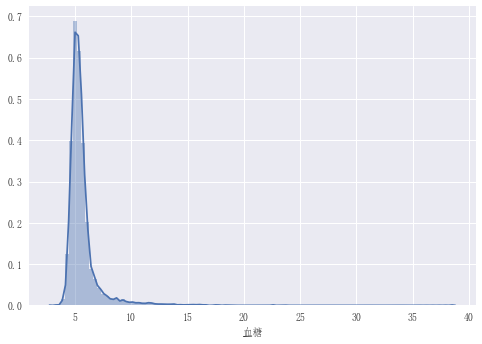

In [48]:
sns.distplot(data_train['血糖'],bins=100)
plt.show()

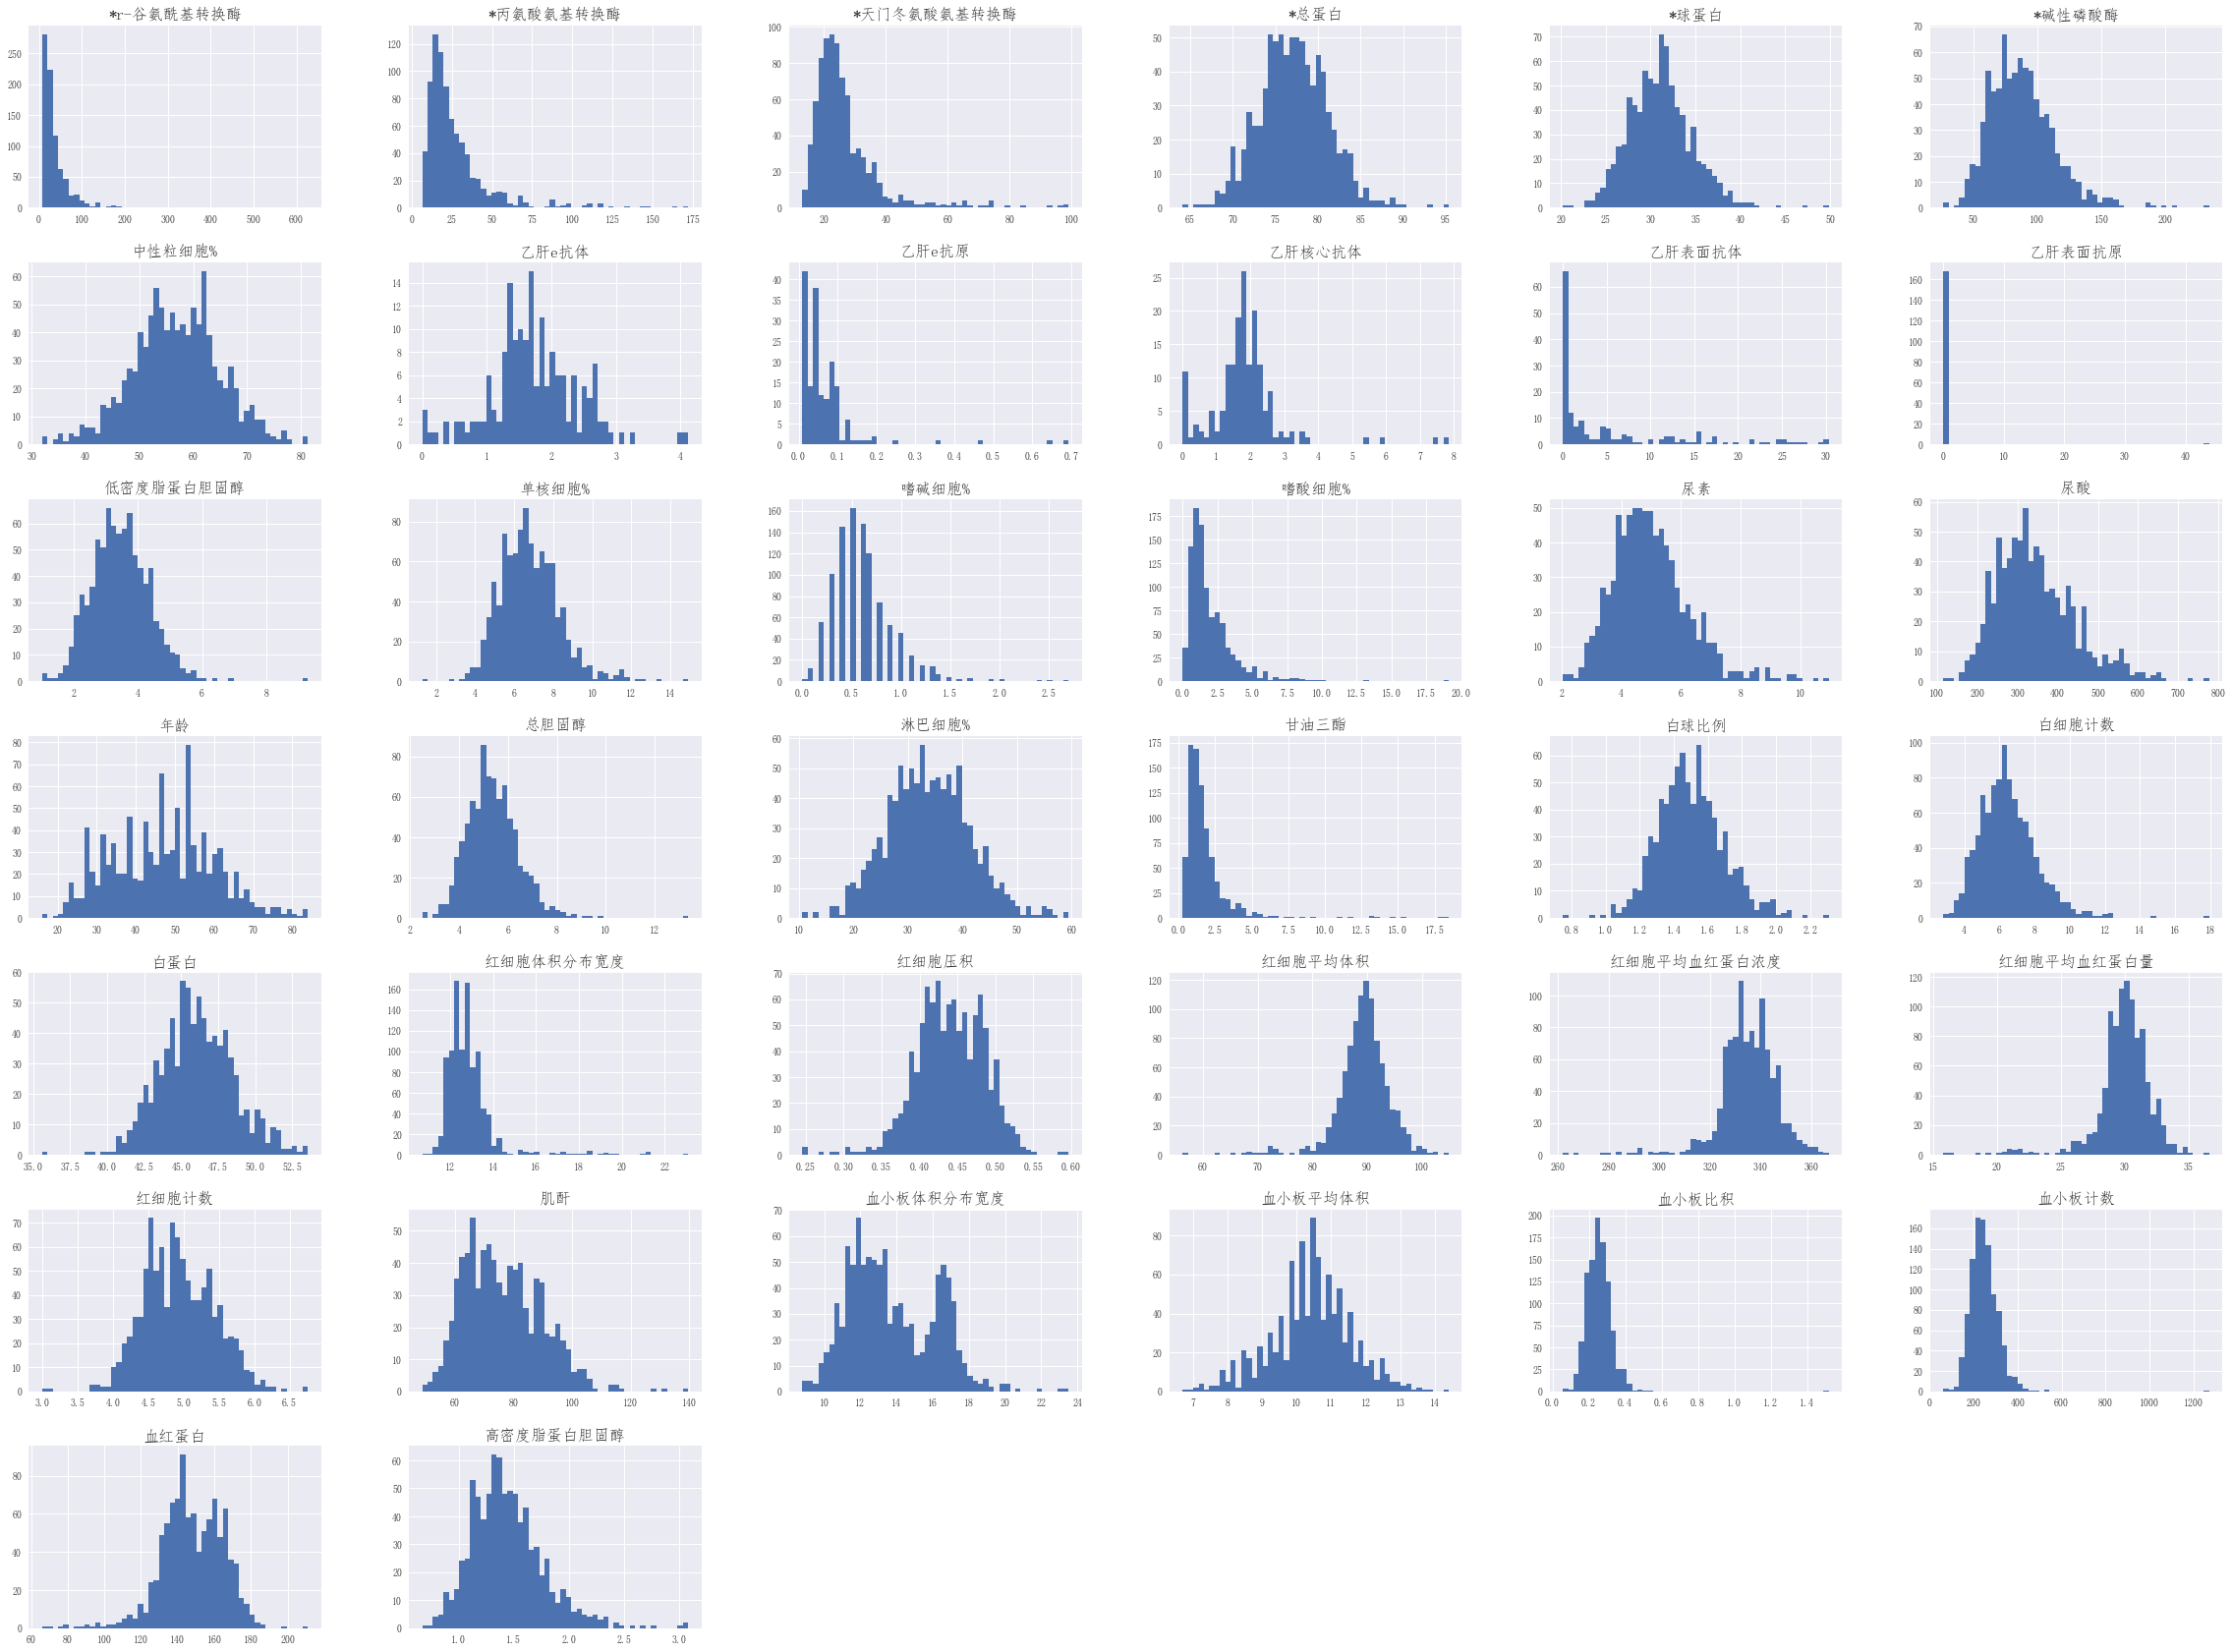

In [18]:
test.hist(bins=50,figsize=(40,30))
plt.show()

In [96]:
# samples_na = 1- train.apply(lambda x: x.count(),axis=1)/(train.shape[1])
samples_na.value_counts()/train.shape[0]

0.121951    0.458171
0.000000    0.239986
0.487805    0.163240
0.195122    0.072315
0.414634    0.042893
0.219512    0.006026
0.390244    0.005495
0.317073    0.004431
0.292683    0.003545
0.536585    0.002659
0.073171    0.000709
0.365854    0.000354
0.097561    0.000177
dtype: float64

In [83]:
test['体检日期'] = pd.to_datetime(test['体检日期'])
test.sort_values('体检日期')

,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,总胆固醇,高密度脂蛋白胆固醇,低密度脂蛋白胆固醇,尿素,肌酐,尿酸,乙肝表面抗原,乙肝表面抗体,乙肝e抗原,乙肝e抗体,乙肝核心抗体,白细胞计数,红细胞计数,血红蛋白,红细胞压积,红细胞平均体积,红细胞平均血红蛋白量,红细胞平均血红蛋白浓度,红细胞体积分布宽度,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5733,男,54,2017-10-10,23.85,26.69,116.08,34.36,82.75,46.03,36.72,1.25,1.07,5.03,1.44,3.01,4.58,65.87,303.37,NaN,NaN,NaN,NaN,NaN,9.39,4.94,151.0,0.453,91.7,30.6,333.0,12.3,241.0,10.8,12.8,0.260,58.4,33.2,7.5,0.6,0.3
5757,男,67,2017-10-10,21.61,26.53,105.41,63.46,72.12,44.70,27.42,1.63,2.81,6.47,1.47,4.15,5.66,106.66,411.56,NaN,NaN,NaN,NaN,NaN,6.59,5.29,160.0,0.486,91.9,30.2,329.0,12.1,252.0,10.9,13.7,0.280,66.7,24.1,5.0,3.3,0.9
5758,女,62,2017-10-10,23.30,19.39,99.78,30.93,78.91,45.86,33.05,1.39,1.90,7.75,1.74,5.20,4.54,57.92,290.18,NaN,NaN,NaN,NaN,NaN,7.88,4.74,136.0,0.413,87.1,28.7,329.0,12.2,295.0,11.0,13.5,0.330,67.4,23.6,5.5,3.0,0.5
5759,男,55,2017-10-10,24.86,14.99,60.59,53.22,73.14,42.07,31.07,1.35,1.05,4.61,1.53,2.68,3.91,86.90,549.29,NaN,NaN,NaN,NaN,NaN,7.53,5.70,164.0,0.480,84.2,28.8,342.0,12.7,233.0,10.3,11.4,0.240,72.3,20.6,5.3,1.3,0.5
5760,女,48,2017-10-10,24.01,30.01,76.12,13.70,74.43,42.42,32.01,1.33,0.83,4.63,1.28,2.91,4.13,65.87,253.85,NaN,NaN,NaN,NaN,NaN,6.88,4.62,139.0,0.408,88.3,30.1,341.0,11.6,294.0,10.1,11.4,0.300,54.0,38.7,6.0,1.0,0.3
5761,女,35,2017-10-10,18.95,12.76,89.72,13.66,81.14,46.80,34.34,1.36,1.25,4.05,1.31,2.18,5.01,72.67,215.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5762,男,47,2017-10-10,25.51,56.96,76.74,22.93,77.53,45.16,32.37,1.40,0.64,3.69,1.16,2.22,5.17,101.53,436.27,0.04,23.430,0.05,1.93,1.590,6.46,5.53,165.0,0.508,91.9,29.8,325.0,11.3,289.0,10.2,12.2,0.300,61.4,28.9,8.0,1.5,0.2
5763,男,38,2017-10-10,35.18,56.64,106.03,48.47,82.02,48.09,33.93,1.42,1.70,5.97,1.39,3.95,4.17,81.93,417.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5764,男,46,2017-10-10,28.34,27.87,142.43,35.44,73.69,47.90,25.79,1.86,0.97,5.49,1.61,3.42,6.57,96.06,574.96,NaN,NaN,NaN,NaN,NaN,6.35,4.71,145.0,0.421,89.4,30.8,344.0,12.2,234.0,12.1,15.8,0.280,52.6,36.2,8.2,2.7,0.3


In [98]:
1- test.apply(lambda x: x.count(),axis=0)/test.shape[0]

性别             0.000
年龄             0.000
体检日期           0.000
*天门冬氨酸氨基转换酶    0.185
*丙氨酸氨基转换酶      0.185
*碱性磷酸酶         0.185
*r-谷氨酰基转换酶     0.185
*总蛋白           0.185
白蛋白            0.185
*球蛋白           0.185
白球比例           0.185
甘油三酯           0.176
总胆固醇           0.176
高密度脂蛋白胆固醇      0.176
低密度脂蛋白胆固醇      0.176
尿素             0.194
肌酐             0.194
尿酸             0.194
乙肝表面抗原         0.831
乙肝表面抗体         0.831
乙肝e抗原          0.831
乙肝e抗体          0.831
乙肝核心抗体         0.831
白细胞计数          0.005
红细胞计数          0.005
血红蛋白           0.005
红细胞压积          0.005
红细胞平均体积        0.005
红细胞平均血红蛋白量     0.005
红细胞平均血红蛋白浓度    0.005
红细胞体积分布宽度      0.005
血小板计数          0.005
血小板平均体积        0.006
血小板体积分布宽度      0.006
血小板比积          0.006
中性粒细胞%         0.005
淋巴细胞%          0.005
单核细胞%          0.005
嗜酸细胞%          0.005
嗜碱细胞%          0.005
dtype: float64

In [99]:
test_samples_na = 1- test.apply(lambda x: x.count(),axis=1)/(test.shape[1])
test_samples_na.value_counts()/test.shape[0]

0.125    0.608
0.000    0.166
0.500    0.156
0.200    0.018
0.400    0.014
0.225    0.012
0.325    0.011
0.300    0.005
0.550    0.004
0.425    0.004
0.075    0.001
0.275    0.001
dtype: float64

In [31]:
data_train['血糖'].describe()
# 线上的均值5.745，方差1.4479

count    5642.000000
mean        5.631925
std         1.544882
min         3.070000
25%         4.920000
50%         5.290000
75%         5.767500
max        38.430000
Name: 血糖, dtype: float64

In [60]:
np.linalg.norm(data_train['血糖']-5.632,ord=2)/data_train.shape[0]

116.03081542417944

In [71]:
mse(data_train['血糖'],np.array([5.632 for i in range(data_train.shape[0])]))

2.3862371726338178